# Neural network implementation

In [111]:
import os
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt

from dyn_fed.data.mnist import MNist
import dyn_fed.activations.activation as F

%reload_ext autoreload
%autoreload 2

%matplotlib inline

## Read in data

In [69]:
data_dir = "../data/mnist"
filepaths = {
    "train": {
        "images": os.path.join(data_dir, "train-images-idx3-ubyte.gz"), "labels": os.path.join(data_dir, "train-labels-idx1-ubyte.gz")
    },
    "test": {
        "images": os.path.join(data_dir, "t10k-images-idx3-ubyte.gz"), "labels": os.path.join(data_dir, "t10k-labels-idx1-ubyte.gz")
    }
}
mnist = MNist(filepaths)

In [70]:
data_dir = "../data/fashion-mnist/"
filepaths = {
    "train": {
        "images": os.path.join(data_dir, "train-images-idx3-ubyte.gz"), "labels": os.path.join(data_dir, "train-labels-idx1-ubyte.gz")
    },
    "test": {
        "images": os.path.join(data_dir, "t10k-images-idx3-ubyte.gz"), "labels": os.path.join(data_dir, "t10k-labels-idx1-ubyte.gz")
    }
}
fashion_mnist = MNist(filepaths)

In [71]:
mnist

<MNist X_train=(60000, 784), y_train=(60000, 10), X_test=(10000, 784), y_test=(10000, 10)>

In [72]:
n_features, n_classes = mnist.X_train.shape[1], mnist.y_train.shape[1]
print(f"n_features={n_features}, n_classes={n_classes}")

n_features=784, n_classes=10


In [73]:
# class NeuralNet(nn.Model):
    
#     def __init__(self):
        
#         # MLP - 1 input layer, 1 hidden layer, 1 output layer
#         # self.fc1 = nn.Layer(n_inputs=784, n_outputs=128)
#         # self.fc2 = nn.Layer(n_inputs=128, n_outputs=10)
#         self.layers = []
#         # self.act_fn = F.Sigmoid()
        
#     def add(self, layer):
#         """Add layer to model
#         """
#         self.layers.append(layer)
#         return self
    
#     def forward(self, x):
        
#         # z1 = self.fc1(x)
#         # a1 = self.act_fn(z1)
#         # a1, z1 = self.fc1(x)
#         # z2 = self.fc2(a1)
#         # y_pred = self.act_fn(z2)
#         # y_pred, z2 = self.fc2(a1)
        
#         a = x
#         for layer in self.layers:
#             print(layer)
#             layer(a)
#             a = layer.y
        
#         y_pred = a
#         return y_pred
    
#     def backward():
#         pass
    
# #     def backward(self, x, y, a_n):
        
# #         y_pred, z2, a1, z1 = a_n
# #         # Output layer error
# #         delta2 = (y_pred - y)# * self.act_fn.grad(z2)
# #         # Gradient of cost function
# #         dw2 = np.dot(a1.T, delta2)
# #         # Backpropagate the error through the network
# #         delta1 = np.dot(delta2, self.fc2.W.T) * self.act_fn.grad(z1)
# #         # Calculate gradient
# #         dw1 = np.dot(x.T, delta1)
# #         # Gradient of biases equal to the error
# #         db2 = np.sum(delta2, axis=0, keepdims=True)
# #         db1 = np.sum(delta1, axis=0, keepdims=True)
# #         return dw2, db2, dw1, db1

In [74]:
# def cross_entropy_loss(y_pred, y):
#     return np.mean(-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred))

In [75]:
# def accuracy_score(y, y_pred):
#     y_pred_ = y_pred.argmax(axis=1)
#     y_ = y.argmax(axis=1)
#     return np.sum(y_pred_==y_) / y_.shape[0]

# from fault_tolerant_ml.ml.ops.tensor import Tensor

# t = Tensor(mnist.X_train)
# W = Tensor(np.random.randn(784, 128))
# b = Tensor(np.random.randn(1, 128))

# x1 = Tensor(np.array(3), requires_grad=True)
# x2 = Tensor(np.array(7), requires_grad=False)

# interim = ((x1 + x1) + x2)
# f = interim * interim

# $(2x_1 + x_2)^2 = 4x_1^2 + 4x_1x_2 +x_2^2$ 

# $\frac{\partial{df}}{\partial{x_1}} =8x_1 + 4x_2 = 24 + 28 = 52$

# $\frac{\partial{df}}{\partial{x_2}} =4x_1 + 2x_2 = 12 + 14 = 26$

# f.backward()

# x1.grad

# model = NeuralNet()
# model.add(nn.Layer(n_inputs=784, n_outputs=128))
# model.add(nn.Layer(n_inputs=128, n_outputs=10))
# y_pred = model.forward(mnist.X_train)

# l = 
# for layer in model.layers[::-1]:
#     print(layer)

In [76]:
# model = NeuralNet()
# print(model.fc1.shape)
# print(model.fc2.shape)
# epochs = 400
# learning_rate = 0.99
# m = mnist.X_train.shape[0]
# for epoch in np.arange(epochs):
    
#     # Feedforward
#     y_pred, z2, a1, z1 = model.forward(mnist.X_train)
    
#     # Calculate cost
#     loss = cross_entropy_loss(y_pred, mnist.y_train)
    
#     # Backprop
#     dw2, db2, dw1, db1 = model.backward(mnist.X_train, mnist.y_train, [y_pred, z2, a1, z1])
    
#     # Update weights
#     model.fc2.W = model.fc2.W - learning_rate * 1 / m * dw2
#     model.fc1.W = model.fc1.W - learning_rate * 1 / m * dw1
#     model.fc2.b = model.fc2.b - learning_rate * 1 / m * db2
#     model.fc1.b = model.fc1.b - learning_rate * 1 / m * db1
    
#     acc = accuracy_score(mnist.y_train, y_pred)
#     if epoch % 10 == 0:
#         print(f'epoch = {epoch}, loss = {loss:.3f}, TRAIN ACC = {acc:.3f}')
#     epoch += 1
    

## Autograd

## Graph

In [77]:
# g = Graph()

# g.set_as_default()

# X = Tensor(mnist.X_train)

# X + W

# W = Variable(np.random.rand(784, 128))

# b = Variable(np.zeros(shape=(1, 128)))

# z = add(matmul(X, W), b)

# z.input_nodes[0].input_nodes[0]

# z.compute()

In [78]:
# from fault_tolerant_ml.ml.ops import tensor as ft

# g = ft.Graph()
# g.set_as_default()
# X = ft.Tensor(mnist.X_train)
# y = ft.Tensor(mnist.y_train)

# W = ft.Tensor(np.random.randn(784, 128))

# b = ft.Tensor(np.zeros((1, 784)))

# a = ft.matmul(X, W)
# # z = ft.add(W, b)

# g.operations

# def evalulate(f):
#     val = []
#     for i, op in enumerate(f.operations):
#         print(*op.input_nodes)
#         val.append(op.compute(*op.input_nodes))

# def traverse(f):
    
#     operations = []
#     def recurse(node):
#         if isinstance(node, ft.Operation):
#             for input_node in node.input_nodes:
#                 recurse(input_node)
#         operations.append(node)
            
#     recurse(f)
#     return operations

# g = ft.Graph()
# g.set_as_default()
# x1 = ft.Tensor(np.array(3))
# x2 = ft.Tensor(np.array(7))

# f = ft.square(ft.add(ft.add(x1, x1), x2))

# traverse(f)

# g.operations[0].input_nodes

In [79]:
# evalulate(g)

In [80]:
# l = [ ("z1", "add", ("x1","x1")),
# ("z2", "add", ("z1","x2")),
# ("f", "square", ("z2",)) ]

# G = { "add" : lambda a,b: a+b,
# "square": lambda a:a*a }

In [81]:
# val = { "x1" : 3, "x2" : 7 }

# for step in l:
#     print(val)
#     var, op_name, func = step
#     lookup = list(map(val.get, func))
#     val[var] = G[op_name](*lookup)

In [82]:
# DG = { "add" : [ (lambda a,b: 1), (lambda a,b: 1) ],
# "square": [ lambda a:2*a ] }

# delta={}
# delta["f"] = 1
# for step in l[::-1]:
#     var, op_name, func = step
#     for op in DG[op_name]:
#         if var not in delta:
#             delta[var] = 0
#         lookup = list(map(val.get, func))
#         print(lookup)
#         delta[var] = delta[var] + DG[op_name](*lookup)

In [83]:
# class Tensor(object):
    
#     def __init__(self, data: np.ndarray, depends_on=None):
        
#         self.depends_on = depends_on or []
#         self.data = data
            
#     def __add__(self, other):
#         return Tensor(self.data + other.data, depends_on=[self, other])
    
#     def __pow__(self, p):
#         data = self.data ** p 
#         return Tensor(data, depends_on=[self])
    
#     def __repr__(self):
#         return f"Tensor({self.data}, dtype={self.data.dtype})"


# y1 = Tensor(np.array(3))
# y2 = Tensor(np.array(7))
# z1 = y1 + y1
# z2 = z1 ** 2

# z2.depends_on

# layers = []

In [84]:
from dyn_fed.activations.activation import Sigmoid

In [85]:
from dyn_fed.losses.loss_fns import CrossEntropyLoss, MSELoss
from dyn_fed.models import Model
from dyn_fed.layers import Layer
from dyn_fed.optimizers import SGD
from dyn_fed.metrics import accuracy_scorev2
import time

In [107]:
def train(model, X_train, y_train, X_test, y_test, batch_size=32, epochs=100):
    train_losses = []
    test_losses = []
    train_accs = []
    test_accs = []
    for epoch in np.arange(epochs):
        epoch_loss = 0.0
        n_batches = 0
        for start in range(0, X_train.shape[0], batch_size):
            end = start + batch_size

            X_batch = X_train[start:end]
            y_batch = y_train[start:end]

            # Feedforward
            y_pred = model.forward(X_batch)
            
            # print(y_pred[1])

            # Calculate loss
            batch_loss = loss.loss(y_batch, y_pred, reduce=True).data

            # Backprop
            optimizer.compute_gradients(model, y_batch, y_pred)

            # Update gradients
            optimizer.apply_gradients(model)

            epoch_loss = epoch_loss + batch_loss
            n_batches += 1

        epoch_loss = epoch_loss / n_batches

        # Calculate accuracy
        y_pred_train = model.forward(X_train)
        train_acc = accuracy_scorev2(y_train.data, y_pred_train.data)
        train_accs.append(train_acc)
        # Test accuracy
        y_pred_test = model.forward(X_test)
        test_acc = accuracy_scorev2(y_test.data, y_pred_test.data)
        test_loss = loss.loss(y_test.data, y_pred_test.data, reduce=True)
        test_accs.append(test_acc)
        test_losses.append(test_loss)
        train_losses.append(epoch_loss)

        if epoch % 1 == 0:
            print(f"Iteration {epoch}: Loss={epoch_loss:.4f}, train accuracy={train_acc:.4f}, test accuracy={test_acc:.4f}")
        epoch += 1
        
    return epoch_loss, train_losses, test_losses, train_accs, test_accs

In [117]:
# Define loss
loss = CrossEntropyLoss()
# loss = MSELoss()

# Define optimizer
optimizer = SGD(loss, learning_rate=0.1)

# Define model
model = Model(optimizer=optimizer)
l1 = Layer(784, 10, activation="sigmoid")
# l2 = Lay(128, 128)
# l3 = Layer(128, 10)
# Add layers
model.add([l1])

# Tensorize numpy arrays
X_train = mnist.X_train
y_train = mnist.y_train
X_test = mnist.X_test
y_test = mnist.y_test
batch_size = 64

In [118]:
%time y_pred = model.forward(X_train)

CPU times: user 73.8 ms, sys: 975 µs, total: 74.8 ms
Wall time: 12.4 ms


In [119]:
%%time
_, train_losses, test_losses, train_accs, test_accs = (
    train(model, X_train, y_train, X_test, y_test, batch_size=batch_size, epochs=100)
)

Iteration 0: Loss=0.2017, train accuracy=0.8612, test accuracy=0.8709
Iteration 1: Loss=0.1542, train accuracy=0.8778, test accuracy=0.8881
Iteration 2: Loss=0.1458, train accuracy=0.8852, test accuracy=0.8949
Iteration 3: Loss=0.1421, train accuracy=0.8898, test accuracy=0.8982
Iteration 4: Loss=0.1401, train accuracy=0.8928, test accuracy=0.9002
Iteration 5: Loss=0.1388, train accuracy=0.8953, test accuracy=0.9031
Iteration 6: Loss=0.1380, train accuracy=0.8971, test accuracy=0.9052
Iteration 7: Loss=0.1375, train accuracy=0.8987, test accuracy=0.9064
Iteration 8: Loss=0.1372, train accuracy=0.9001, test accuracy=0.9078
Iteration 9: Loss=0.1370, train accuracy=0.9013, test accuracy=0.9088
Iteration 10: Loss=0.1368, train accuracy=0.9025, test accuracy=0.9097
Iteration 11: Loss=0.1368, train accuracy=0.9034, test accuracy=0.9106
Iteration 12: Loss=0.1368, train accuracy=0.9042, test accuracy=0.9119
Iteration 13: Loss=0.1368, train accuracy=0.9050, test accuracy=0.9122
Iteration 14: Lo

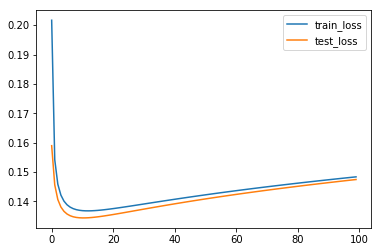

In [120]:
plt.plot(train_losses, label='train_loss')
plt.plot(test_losses, label='test_loss')
plt.legend()

## Fashion mnist

In [35]:
f_loss = MSELoss()

# Define optimizer
f_optimizer = SGD(f_loss, learning_rate=0.001)

# Define model
f_model = Model(optimizer=optimizer)
f_l1 = Layer(784, 10, activation="linear")
# l2 = Lay(128, 128)
# l3 = Layer(128, 10)
# Add layers
f_model.add([f_l1])
batch_size = 32

In [37]:
train(
    f_model,
    fashion_mnist.X_train,
    fashion_mnist.y_train,
    fashion_mnist.X_test,
    fashion_mnist.y_test,
    batch_size=batch_size,
    epochs=100
)

Iteration 0: Loss=0.0258, train accuracy=0.7375, test accuracy=0.7279
Iteration 1: Loss=0.0210, train accuracy=0.7761, test accuracy=0.7645
Iteration 2: Loss=0.0198, train accuracy=0.7904, test accuracy=0.7785
Iteration 3: Loss=0.0192, train accuracy=0.7976, test accuracy=0.7860
Iteration 4: Loss=0.0188, train accuracy=0.8028, test accuracy=0.7913
Iteration 5: Loss=0.0185, train accuracy=0.8060, test accuracy=0.7947
Iteration 6: Loss=0.0183, train accuracy=0.8088, test accuracy=0.7982
Iteration 7: Loss=0.0181, train accuracy=0.8111, test accuracy=0.8006
Iteration 8: Loss=0.0180, train accuracy=0.8127, test accuracy=0.8016
Iteration 9: Loss=0.0179, train accuracy=0.8135, test accuracy=0.8035
Iteration 10: Loss=0.0178, train accuracy=0.8146, test accuracy=0.8047
Iteration 11: Loss=0.0177, train accuracy=0.8155, test accuracy=0.8048
Iteration 12: Loss=0.0176, train accuracy=0.8161, test accuracy=0.8055
Iteration 13: Loss=0.0176, train accuracy=0.8169, test accuracy=0.8060
Iteration 14: Lo

0.01689868272691965